---
Start
---

This assignment is very simple. Attached is a file that contains 5 sentences from the book "Moonwalking with Einstein" :PassagesFromMoonwalkingWithEinstein.txt

Either read the sentences from the file and store it in a list, or copy/paste them into your code with different variable names. (10 pts)
Perform POS Tagging on all sentences and print the results. (It does not matter which tool you prefer to use, but I suggest you to have a look at the results and choose the one that produces more correct results according to your observation.) (40 points)
Perform Dependency and Constituency Parsing on all sentences and print the results. (visualized versions must be included). (50 points)

### 1 Read the file into a list

In [1]:
with open("PassagesFromMoonwalkingWithEinstein.txt", "r+") as reader:
    data = reader.read().strip().split("\n")
    
    # remove empty items from list, and also numbering made
    data = [x[2:].strip() for x in data if len(x)> 0]

    reader.close()

In [2]:
print(data)

['The average person squanders about forty days a year compensating for things he or she has forgotten.', 'It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.', 'A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.', 'What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.', 'In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.']


In [3]:
print(f"We Have {len(data)} sentenses to analyse")

We Have 5 sentenses to analyse


### 2. POS tagging

- The sentenses will first be cleaned by removing puctuations and extra spaces

In [4]:
# here a function to process each text is created
import re
import nltk
def txt_processing(text):
    """
    This function removes any puctuations in the text
    It also removes extra spaces
    Finally It returns Each word as a token
    """
    
    # convert to lowercase
    text = text.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # tokenize the text into words
    #words = text.split()
    
    return text.strip()

In [5]:
data_cleaned = [txt_processing(x) for x in data]

In [6]:
print(data_cleaned)

['the average person squanders about forty days a year compensating for things he or she has forgotten', 'it was simply a matter of learning to  think in more memorable ways  using the  extraordinarily simple  2 500 year old mnemonic technique known as the  memory palace  that simonides of ceos had supposedly invented in the rubble of the great banquet hall collapse', 'a trained memory was not just a handy tool  but a fundamental facet of any worldly mind', 'what we have been doing over the last century is defining memory incorrectly  understanding it incompletely  applying it inappropriately  and condemning it because it doesn t work and isn t enjoyable', 'in a sense  the elaborate system of externalized memory we ve created is a way of fending off mortality']


In [7]:
# download spacy

import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [8]:
# Get POS for Each WOrd.
"""
Results will be a tuple where each tuple has the word and Its token
We are using NLTK
"""


for i, sentense in enumerate(data_cleaned):
    doc_tags = nlp(sentense)
    print(f"Sentense Number {i+1} POS Tags are as follows")
    for token in doc_tags:
        print('%r (%s)' % (str(token), token.pos_))
    
    

Sentense Number 1 POS Tags are as follows
'the' (DET)
'average' (ADJ)
'person' (NOUN)
'squanders' (VERB)
'about' (ADP)
'forty' (NUM)
'days' (NOUN)
'a' (DET)
'year' (NOUN)
'compensating' (VERB)
'for' (ADP)
'things' (NOUN)
'he' (PRON)
'or' (CCONJ)
'she' (PRON)
'has' (AUX)
'forgotten' (VERB)
Sentense Number 2 POS Tags are as follows
'it' (PRON)
'was' (AUX)
'simply' (ADV)
'a' (DET)
'matter' (NOUN)
'of' (ADP)
'learning' (VERB)
'to' (PART)
' ' (SPACE)
'think' (VERB)
'in' (ADP)
'more' (ADV)
'memorable' (ADJ)
'ways' (NOUN)
' ' (SPACE)
'using' (VERB)
'the' (DET)
' ' (SPACE)
'extraordinarily' (ADV)
'simple' (ADJ)
' ' (SPACE)
'2' (NUM)
'500' (NUM)
'year' (NOUN)
'old' (ADJ)
'mnemonic' (ADJ)
'technique' (NOUN)
'known' (VERB)
'as' (ADP)
'the' (DET)
' ' (SPACE)
'memory' (NOUN)
'palace' (NOUN)
' ' (SPACE)
'that' (SCONJ)
'simonides' (NOUN)
'of' (ADP)
'ceos' (NOUN)
'had' (AUX)
'supposedly' (ADV)
'invented' (VERB)
'in' (ADP)
'the' (DET)
'rubble' (NOUN)
'of' (ADP)
'the' (DET)
'great' (ADJ)
'banquet' (NOUN

### 3. Dependency and Consistensy

#### 3.1 Dependency Parsing

In [9]:
from IPython.display import Image, display
from nltk.draw import TreeWidget
from nltk.tree import Tree
from nltk.draw.util import CanvasFrame
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
from nltk import pos_tag, word_tokenize, RegexpParser 


# POS Extraction
chunker = RegexpParser(""" 
                       NP: {<DT>?<JJ>*<NN>}    #Noun Phrases 
                       P: {<IN>}               #Prepositions 
                       V: {<V.*>}              #Verbs 
                       PP: {<P> <NP>}          #Prepostional Phrases 
                       VP: {<V> <NP|PP>*}      #Verb Phrases 
                       """) 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!





SENTENSE:   the average person squanders about forty days a year compensating for things he or she has forgotten
***Constituency Parsing***


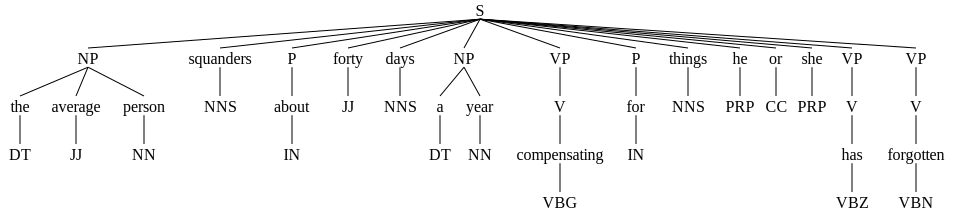

***DEPENDENCY PARSING





SENTENSE:   it was simply a matter of learning to  think in more memorable ways  using the  extraordinarily simple  2 500 year old mnemonic technique known as the  memory palace  that simonides of ceos had supposedly invented in the rubble of the great banquet hall collapse
***Constituency Parsing***


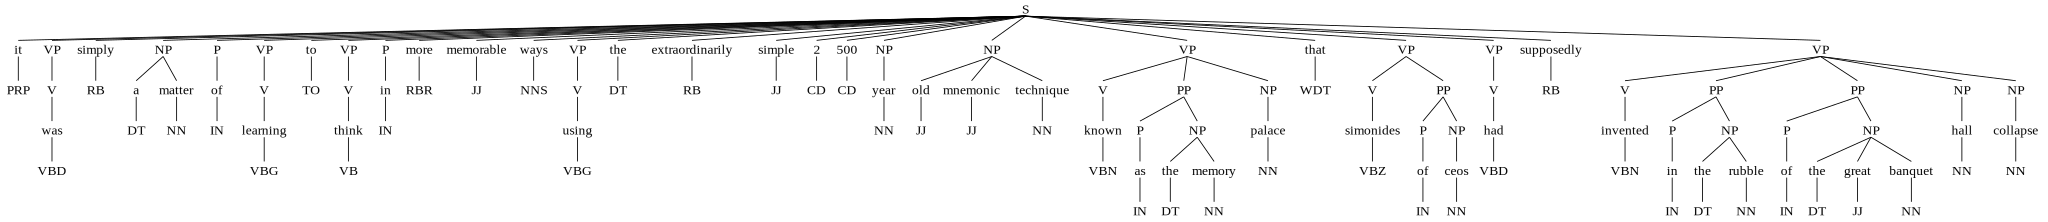

***DEPENDENCY PARSING





SENTENSE:   a trained memory was not just a handy tool  but a fundamental facet of any worldly mind
***Constituency Parsing***


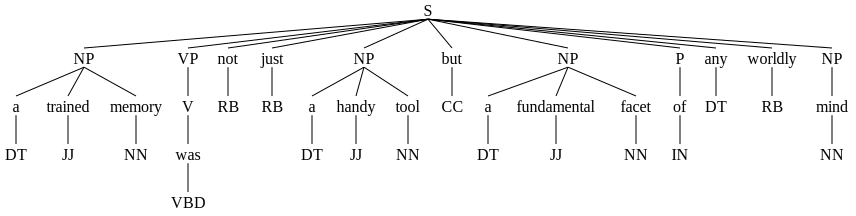

***DEPENDENCY PARSING





SENTENSE:   what we have been doing over the last century is defining memory incorrectly  understanding it incompletely  applying it inappropriately  and condemning it because it doesn t work and isn t enjoyable
***Constituency Parsing***


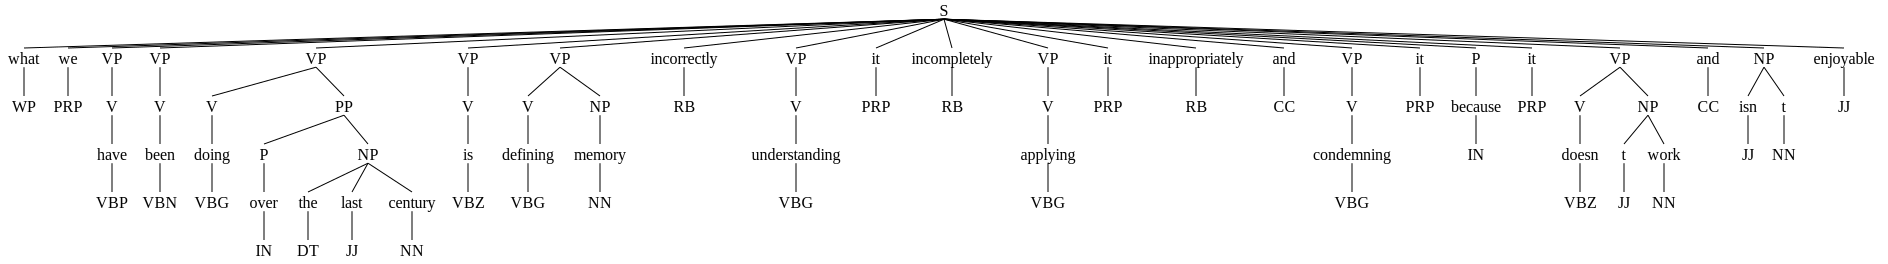

***DEPENDENCY PARSING





SENTENSE:   in a sense  the elaborate system of externalized memory we ve created is a way of fending off mortality
***Constituency Parsing***


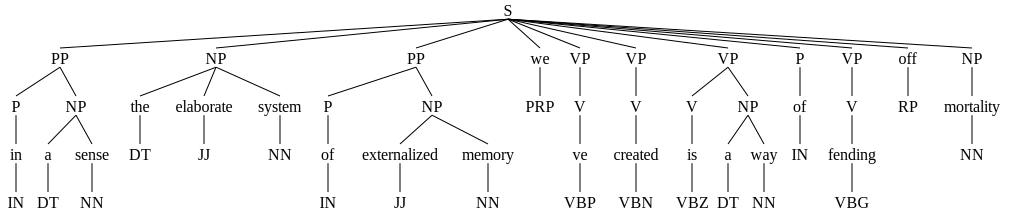

***DEPENDENCY PARSING


In [10]:

# Iterate through all sentense while drawing all the Dependency and Contigency

for sentense in data_cleaned:
    # Find all POS 
    tagged = pos_tag(word_tokenize(sentense)) 
    #extract Consistengy
    output = chunker.parse(tagged) 
    print(f"\n\n\nSENTENSE:   {sentense}")
    #display 
    
    print("***Constituency Parsing***")
    display(output)
    doc = nlp(sentense)
    
    print("***DEPENDENCY PARSING")
    displacy.render(doc, style = "dep")